<a href="https://colab.research.google.com/github/vishwas14/BTechProject/blob/main/TextComplexityClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import nltk
from nltk import *
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_treebank_pos_tagger')
nltk.download('averaged_perceptron_tagger')
from wordcloud import WordCloud
from tabulate import tabulate
import string
import matplotlib.pyplot as plt 
import re
import spacy
from collections import Counter
import en_core_web_sm
#from pywsd import disambiguate  
lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words("english")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:

 
 
#data preprocessing
def to_lowercase(text):
    return  text.lower()
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
def remove_punctuation(text):
    text = re.sub(r'[“|”|‘|’]',' ',text)
    translator = str.maketrans('','', string.punctuation)
    return text.translate(translator)
def remove_whitespace(text):
    return " ".join(text.split())
def remove_chapters(text):
    result = re.sub(r'CHAPTER \d+\.* [\w| ]+\.*',' ',text)
    return result
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in word_tokens]
    return lemmas
 
#Reading texts
file1 = open('T11.txt','r')
file2 = open('T33.txt','r')
text1 = file1.read()
text2= file2.read()
 
text1 = remove_chapters(text1)


sentenceList1 = nltk.sent_tokenize(text1)
print("For T1:")
print('No. of Sentences: ',len(sentenceList1))

text1 = remove_numbers(text1)
text1 = remove_punctuation(text1)
text1 = remove_whitespace(text1)
text1_tokenized = word_tokenize(text1)

 
print("Number Of Tokens in T1->",len(text1_tokenized))
print("Number of Vocab in T1->",len(set(text1_tokenized)))
 
text2 = remove_chapters(text2)


sentenceList2 = nltk.sent_tokenize(text2)
print("For T2:")
print('No. of Sentences: ',len(sentenceList2))

text2 = remove_numbers(text2)
text2 = remove_punctuation(text2)
text2 = remove_whitespace(text2)
text2_tokenized = word_tokenize(text2)
 
print("Number Of Tokens in T2->",len(text2_tokenized))
print("Number of Vocab in T2->",len(set(text2_tokenized)),"\n\n")

For T1:
No. of Sentences:  7840
Number Of Tokens in T1-> 73731
Number of Vocab in T1-> 7317
For T2:
No. of Sentences:  4960
Number Of Tokens in T2-> 66957
Number of Vocab in T2-> 7143 




		For T1:
Total number of words that are Nouns in T1: 18900


			Word Cloud of Nouns for T1


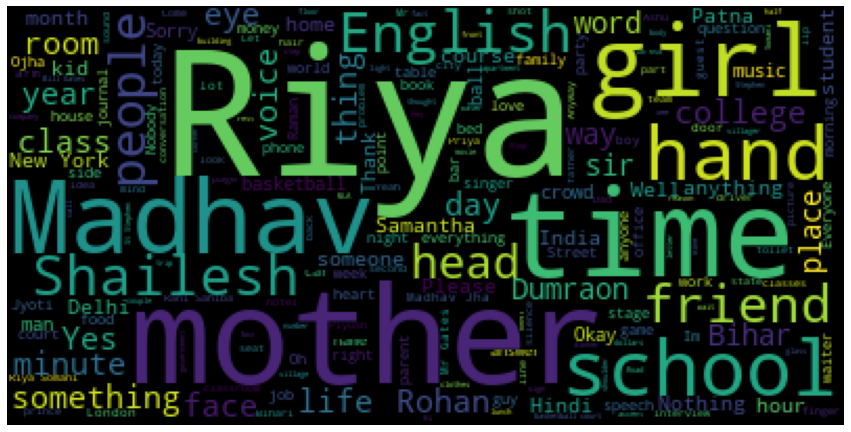



Total number of words that are Verbs in T1: 16142


			Word Cloud of Verbs for T1


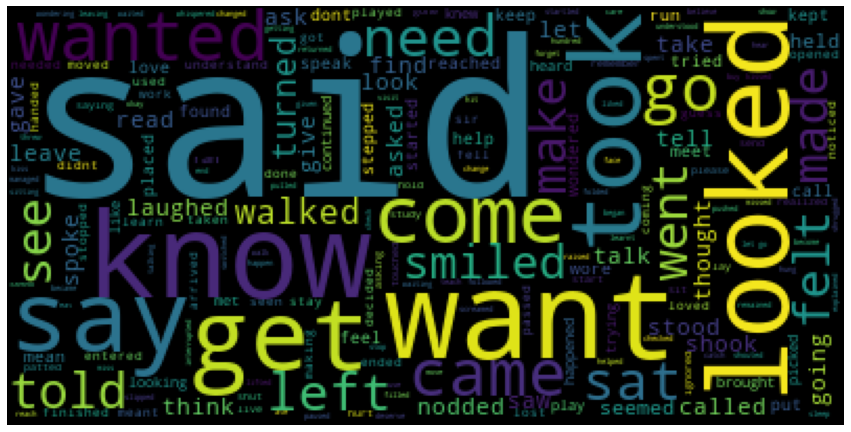



Total number of words that are Adjective in T1: 4500


			Word Cloud of Adjective for T1


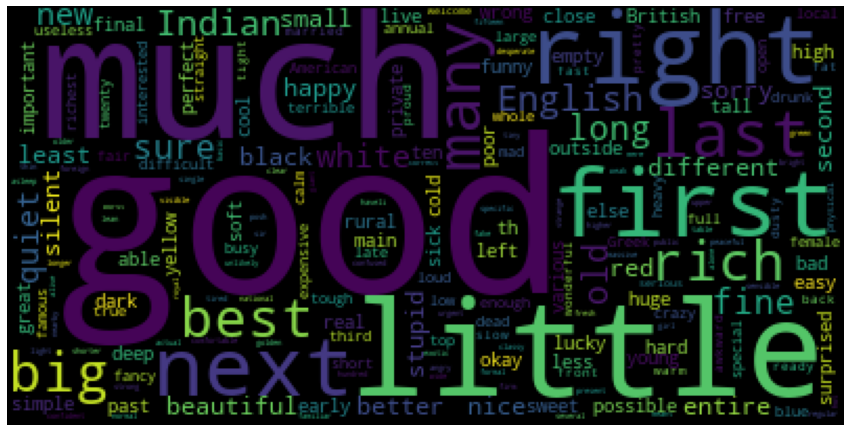



		For T2:
Total number of words that are Nouns in T2: 16331


			Word Cloud of Nouns for T2


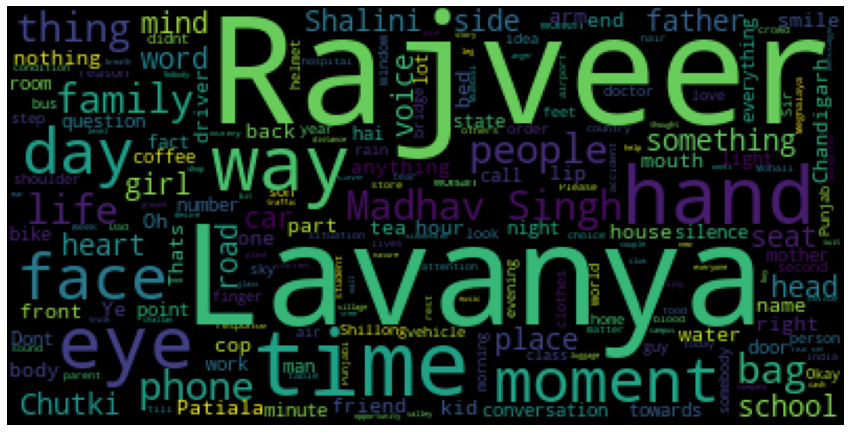



Total number of words that are Verbs in T2: 13780


			Word Cloud of Verbs for T2


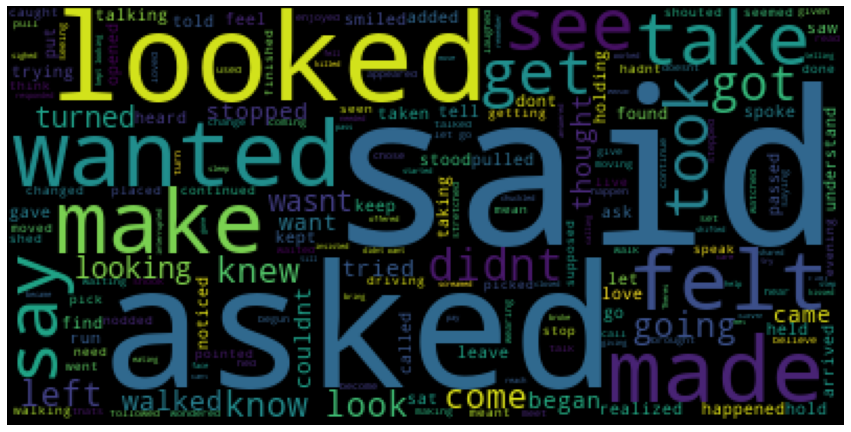



Total number of words that are Adjective in T1: 3657


			Word Cloud of Adjective for T1


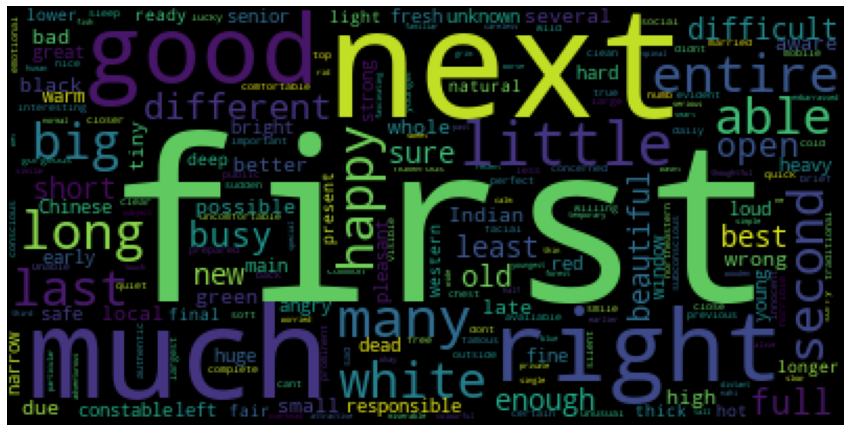

In [ ]:
#POS tagging
#After the POS tagging is done, we separate the Nouns and Verbs in the tagged list 
print("\t\tFor T1:")
tagged = nltk.pos_tag(text1_tokenized)
Noun_tag_T1=[]
Verb_tag_T1=[]
Adj_tag_T1=[]
for word,pos in tagged:
  if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
    Noun_tag_T1.append(word)

  if(pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ'):
      Verb_tag_T1.append(word)
  if(pos == 'JJ' or pos == 'JJR' or pos == 'JJS'):
    Adj_tag_T1.append(word)

print('Total number of words that are Nouns in T1:',len(Noun_tag_T1))
print("\n\n\t\t\tWord Cloud of Nouns for T1")
#Converting all the nouns from the list of T1 into a sentence for Word Cloud
s=' '
for i in Noun_tag_T1:
  s = s + ' '+ i
#print(s)
wordcloud = WordCloud(stopwords = stopwords).generate(s)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


#Converting all the verbs from the list of T1 into a sentence for Word Cloud
print("\n\nTotal number of words that are Verbs in T1:",len(Verb_tag_T1))
print("\n\n\t\t\tWord Cloud of Verbs for T1")
s=' '
for i in Verb_tag_T1:
  s = s + ' '+ i
#print(s)
wordcloud = WordCloud(stopwords = stopwords).generate(s)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#Converting all the adjectives from the list of T1 into a sentence for Word Cloud
print("\n\nTotal number of words that are Adjective in T1:",len(Adj_tag_T1))
print("\n\n\t\t\tWord Cloud of Adjective for T1")
s=' '
for i in Adj_tag_T1:
  s = s + ' '+ i
#print(s)
wordcloud = WordCloud(stopwords = stopwords).generate(s)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


print("\n\n\t\tFor T2:")
tagged = nltk.pos_tag(text2_tokenized)
Noun_tag_T2=[]
Verb_tag_T2=[]
Adj_tag_T2=[]
for word,pos in tagged:
  if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
    Noun_tag_T2.append(word)

  if(pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ'):
      Verb_tag_T2.append(word)

  if(pos == 'JJ' or pos == 'JJR' or pos == 'JJS'):
    Adj_tag_T2.append(word)    

print('Total number of words that are Nouns in T2:',len(Noun_tag_T2))
print("\n\n\t\t\tWord Cloud of Nouns for T2")
#Converting all the nouns from the list of T2 into a sentence for Word Cloud
s=' '
for i in Noun_tag_T2:
  s = s + ' '+ i
#print(s)
wordcloud = WordCloud(stopwords = stopwords).generate(s)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#Converting all the Adjective from the list of T2 into a sentence for Word Cloud
print("\n\nTotal number of words that are Verbs in T2:",len(Verb_tag_T2))
print("\n\n\t\t\tWord Cloud of Verbs for T2")
s=' '
for i in Verb_tag_T2:
  s = s + ' '+ i
#print(s)
wordcloud = WordCloud(stopwords = stopwords).generate(s)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#Converting all the adjectives from the list of T1 into a sentence for Word Cloud
print("\n\nTotal number of words that are Adjective in T1:",len(Adj_tag_T2))
print("\n\n\t\t\tWord Cloud of Adjective for T1")
s=' '
for i in Adj_tag_T2:
  s = s + ' '+ i
#print(s)
wordcloud = WordCloud(stopwords = stopwords).generate(s)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



In [ ]:
!pip install pywsd
!pip install -U wn==0.0.23

     |████████████████████████████████| 26.8 MB 1.6 MB/s 
     |████████████████████████████████| 75 kB 4.1 MB/s 
  Created wheel for pywsd: filename=pywsd-1.2.4-py3-none-any.whl size=26940436 sha256=7c5886ec67efbd1d26c303e1862956bcebda9bd18bd983676605f80c92027ad5
  Stored in directory: /root/.cache/pip/wheels/56/67/c0/6e6fa8456d1374b393328368316c3b33844cb4043bd225bc66
Successfully built pywsd
     |████████████████████████████████| 31.6 MB 71 kB/s 
  Created wheel for wn: filename=wn-0.0.23-py3-none-any.whl size=31792926 sha256=669de82dc22bbab881f6c9cba6f997c994ff6c7aa60bf1caf6cfadd81c4b4837
  Stored in directory: /root/.cache/pip/wheels/ec/47/17/409766c99dd470f34c512000b90b83f34747c2c975769654d7
Successfully built wn
  Attempting uninstall: wn
    Found existing installation: wn 0.9.1
    Uninstalling wn-0.9.1:
      Successfully uninstalled wn-0.9.1


In [ ]:
#Function for Word Sense Disambiguation using pywsd
from pywsd import disambiguate     
def TextDisambiguate(sentenceList):
  sentenceDisambiguated = []
  for sentence in sentenceList:
    sentenceDisambiguated.append(disambiguate(sentence))
  return sentenceDisambiguated

Warming up PyWSD (takes ~10 secs)... took 14.862407207489014 secs.


In [ ]:
sentenceDisambiguated_T1= TextDisambiguate(sentenceList1)
print("A random sentence shown Disambiguated for T1:\n",sentenceDisambiguated_T1[420])


A random sentence shown Disambiguated for T1:
 [('Her', None), ('state', Synset('state_of_matter.n.01')), ('of', None), ('mind', Synset('thinker.n.01')), ('was', None), ('as', None), ('far', Synset('far.r.05')), ('from', None), ('mine', Synset('mine.n.02')), ('as', None), ('possible', Synset('potential.a.01')), ('.', None)]


In [ ]:
sentenceDisambiguated_T2= TextDisambiguate(sentenceList2)
print("A random sentence shown Disambiguated for T2:\n",sentenceDisambiguated_T2[420])

A random sentence shown Disambiguated for T2:
 [('.', None)]


In [ ]:
#converting the disambiguated sentence into list which consists of the word along with its WordNet lexicographer
def  lexicographer(sentenceDisambiguated):
  Lex = []
  for sentence in sentenceDisambiguated:
    for word in sentence:
      if type(word[1])==type(None):
        continue
      Lex.append((word[0],word[1].lexname()))
  return Lex

In [ ]:
Lex_T1 = lexicographer(sentenceDisambiguated_T1)
print('Lex class of some words in T1: ', Lex_T1[100:105])

Lex_T2 = lexicographer(sentenceDisambiguated_T2)
print('\nLex class of some words in T2: ', Lex_T2[100:105])


Lex class of some words in T1:  [('effort', 'noun.act'), ('made', 'verb.creation'), ('trace', 'verb.creation'), ('copyright', 'verb.possession'), ('holders', 'noun.person')]

Lex class of some words in T2:  [('day', 'noun.time'), ('work', 'noun.artifact'), ('took', 'verb.stative'), ('full-time', 'adj.all'), ('writing', 'noun.communication')]


In [ ]:
NounComplexityIndex = {}

For T1

Nouns categories with the count and bar plot:

noun.Tops - 128
noun.act - 1341
noun.animal - 125
noun.artifact - 2512
noun.attribute - 607
noun.body - 256
noun.cognition - 869
noun.communication - 1968
noun.event - 375
noun.feeling - 115
noun.food - 230
noun.group - 958
noun.location - 656
noun.motive - 11
noun.object - 212
noun.person - 1868
noun.phenomenon - 59
noun.plant - 89
noun.possession - 226
noun.process - 22
noun.quantity - 368
noun.relation - 97
noun.shape - 54
noun.state - 363
noun.substance - 211
noun.time - 663


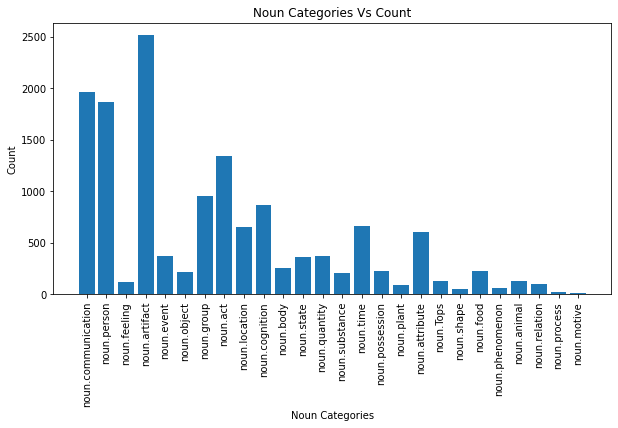



Verbs categories with the count and bar plot:

verb.body - 523
verb.change - 870
verb.cognition - 837
verb.communication - 3116
verb.competition - 281
verb.consumption - 360
verb.contact - 1118
verb.creation - 284
verb.emotion - 435
verb.motion - 1064
verb.perception - 691
verb.possession - 449
verb.social - 603
verb.stative - 1149
verb.weather - 15


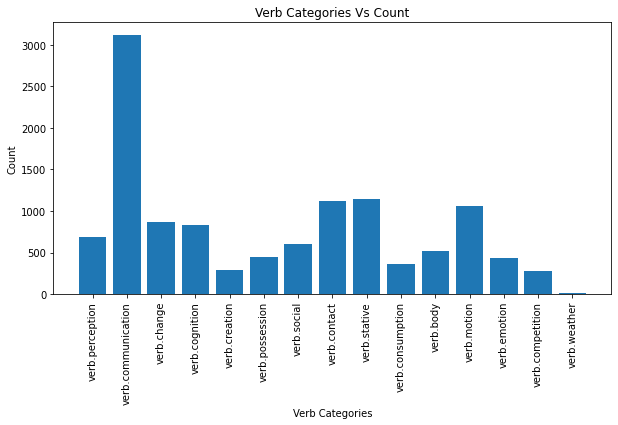

Adjective categories with the count and bar plot:

adj.all - 4158
adj.pert - 152
adj.ppl - 4
adv.all - 2203


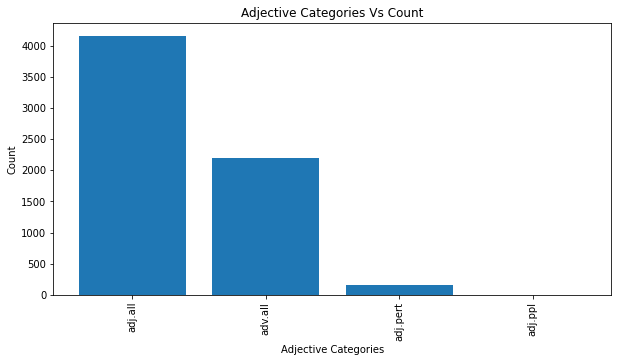



For T2

Nouns categories with the count and bar plot:

noun.Tops - 118
noun.act - 1099
noun.animal - 151
noun.artifact - 2301
noun.attribute - 633
noun.body - 322
noun.cognition - 909
noun.communication - 2426
noun.event - 329
noun.feeling - 177
noun.food - 174
noun.group - 767
noun.location - 575
noun.motive - 15
noun.object - 289
noun.person - 1280
noun.phenomenon - 118
noun.plant - 71
noun.possession - 203
noun.process - 44
noun.quantity - 307
noun.relation - 122
noun.shape - 64
noun.state - 453
noun.substance - 183
noun.time - 561


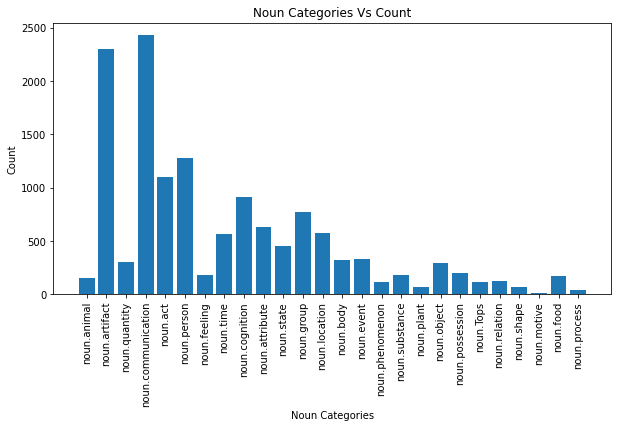



Verbs categories with the count and bar plot:

verb.body - 448
verb.change - 989
verb.cognition - 929
verb.communication - 1678
verb.competition - 214
verb.consumption - 208
verb.contact - 1043
verb.creation - 259
verb.emotion - 287
verb.motion - 952
verb.perception - 644
verb.possession - 441
verb.social - 614
verb.stative - 1091
verb.weather - 31


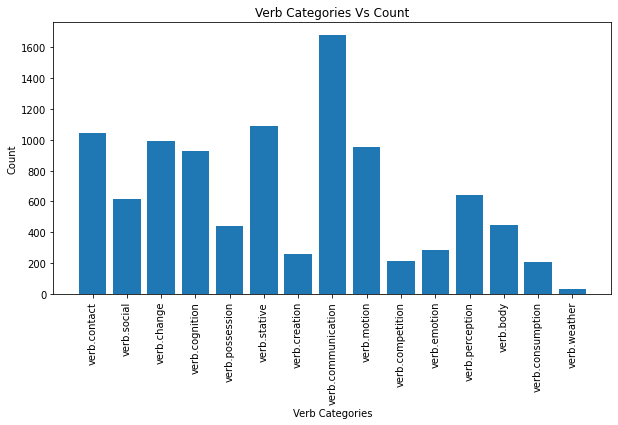

Adjective categories with the count and bar plot:

adj.all - 3397
adj.pert - 59
adj.ppl - 1
adv.all - 2407


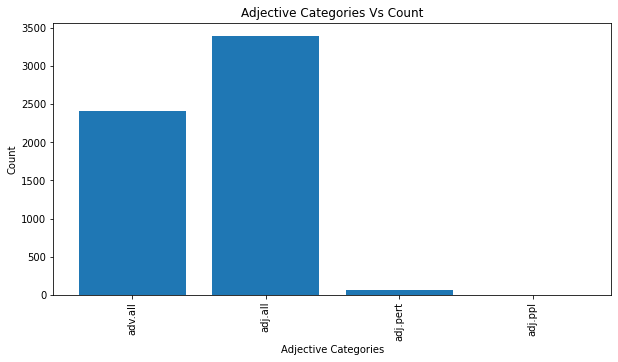

In [ ]:
#depiction of distribution of noun and verb categories for both the books T1 & T2
def NounVerbCategory(Lex):
  NounCategoriesDict = {}
  VerbCategoriesDict = {}
  AdjCategoriesDict = {}
  for word in Lex:
    if word[1][0]=='n':
      NounCategoriesDict[word[1]]= NounCategoriesDict.get(word[1],0) + 1
    elif word[1][0]=='v':
      VerbCategoriesDict[word[1]]= VerbCategoriesDict.get(word[1],0) + 1
    elif word[1][0] == 'a':
       AdjCategoriesDict[word[1]]= AdjCategoriesDict.get(word[1],0) + 1  
  
  #for nouns
  print('Nouns categories with the count and bar plot:\n')
  for i in sorted(NounCategoriesDict.keys()):
    print(i,'-',NounCategoriesDict[i])
  plt.figure(figsize = (10,5))
  plt.title("Noun Categories Vs Count")
  plt.xlabel("Noun Categories")
  plt.ylabel("Count")
  plt.xticks(rotation=90)
  plt.bar(NounCategoriesDict.keys(),NounCategoriesDict.values())
  plt.show()


  #for verbs
  print('\n\nVerbs categories with the count and bar plot:\n')
  for i in sorted(VerbCategoriesDict.keys()):
    print(i,'-',VerbCategoriesDict[i])
  plt.figure(figsize = (10,5))
  plt.title("Verb Categories Vs Count")
  plt.xlabel("Verb Categories")
  plt.ylabel("Count")
  plt.xticks(rotation=90)
  plt.bar(VerbCategoriesDict.keys(),VerbCategoriesDict.values())
  plt.show()
  #plt.bar(VerbCategoriesDict.keys(),VerbCategoriesDict.values())

    #for adjective
  print('Adjective categories with the count and bar plot:\n')
  for i in sorted(AdjCategoriesDict.keys()):
    print(i,'-',AdjCategoriesDict[i])
  plt.figure(figsize = (10,5))
  plt.title("Adjective Categories Vs Count")
  plt.xlabel("Adjective Categories")
  plt.ylabel("Count")
  plt.xticks(rotation=90)
  plt.bar(AdjCategoriesDict.keys(),AdjCategoriesDict.values())
  plt.show()
  
  
  

print('For T1\n')
NounVerbCategory(Lex_T1)
print('\n\nFor T2\n')
NounVerbCategory(Lex_T2)

In [ ]:
#NAMED ENTITY RECOGNITION 

In [ ]:
import spacy
from collections import Counter
import en_core_web_sm

In [ ]:
#using the en_core_web_sm model for NER model
NER_model = en_core_web_sm.load()    

For T1

NER Labels for some random words
[('English', 'LANGUAGE'), ('French', 'NORP'), ('French', 'NORP'), ('English', 'LANGUAGE'), ('English', 'LANGUAGE')]


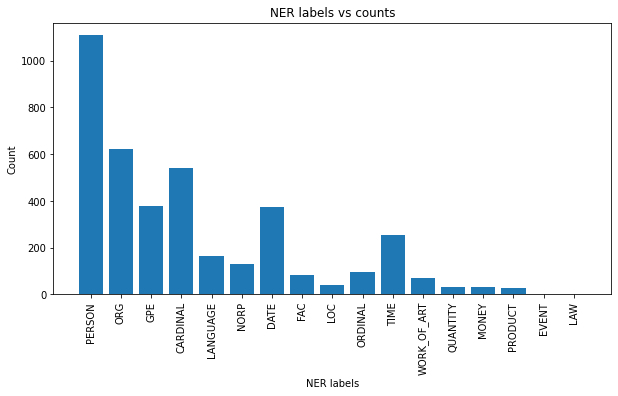


For T2
NER Labels for some random words
[('CHINO', 'PERSON'), ('LAA-TEYH', 'ORG'), ('two', 'CARDINAL'), ('Lavanya', 'PERSON'), ('Lavanya', 'GPE')]


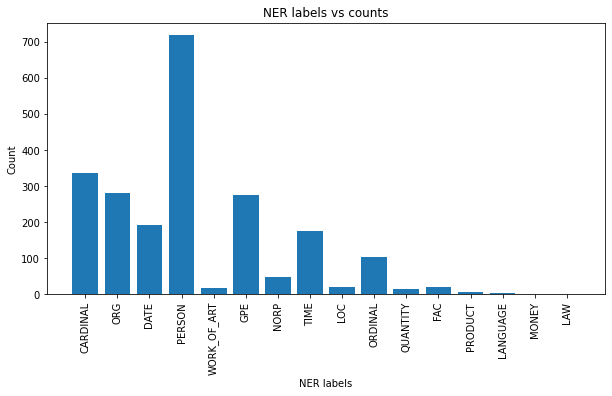

In [ ]:
# function to recognise the entity types based on the trained NER model
def NER(sentenceList):
  NER_labels = []
  NER_lab_counts= {}
  for i in sentenceList:
    temp = NER_model(i)
    for j in temp.ents:
      NER_labels.append((j.text,j.label_))
  for text,label in NER_labels:
    NER_lab_counts[label] = NER_lab_counts.get(label,0) + 1
  print('NER Labels for some random words')
  print(NER_labels[100:105])
  plt.figure(figsize = (10,5))
  plt.title("NER labels vs counts")
  plt.xlabel("NER labels")
  plt.ylabel("Count")
  plt.xticks(rotation=90)
  plt.bar(NER_lab_counts.keys(),NER_lab_counts.values())
  plt.show()
  return NER_labels,NER_lab_counts

print("For T1\n")
NER_labels_T1 = []
NER_lab_counts_T1= {}
NER_labels_T1, NER_lab_counts_T1= NER(sentenceList1)
print("\nFor T2")
NER_labels_T2 = []
NER_lab_counts_T2= {}
NER_labels_T2, NER_lab_counts_T2= NER(sentenceList2)

In [ ]:
#FOR EVALUATING THE PERFORMANCE MEASURE THROUGH MANUAL LABELLING

In [ ]:
#Checking the performance measure 
def scores(actual_dict,predict_dict):
  right= 0
  wrong=0
  unmarked=0
  for i in actual_dict.keys():
    #print(i,actual_dict[i],predict_dict[i])
    if i not in predict_dict.keys():
      unmarked+=1
      continue
    if actual_dict[i] == predict_dict[i]:
      right+=1
    else:
      wrong+=1
  print('Marked right:{}   |   Wrong:{}   |   Left Unmarked:{}'.format(right,wrong,unmarked))
  print("Accuracy is:",right/(right+wrong+unmarked)*100,"%")

#Main function for Evaluation  
def testing(text,Manual_label_dict):
  text_List = nltk.sent_tokenize(text)
  NER_labels = {}
  for i in text_List:
    temp = NER_model(i)
    for j in temp.ents:
      NER_labels[j.text] = NER_labels.get(j.text,' ')+j.label_
      #print((j.text,j.label_))
  scores(Manual_label_dict, NER_labels)

In [ ]:
#Manually picked up texts from T1 along with their manual labelling 
print("\t\t\t\tTesting of labels For T1")
text1 = """No one would have believed in the last years of the nineteenth century
that this world was being watched keenly and closely by intelligences
greater than man’s and yet as mortal as his own; that as men busied
themselves about their various concerns they were scrutinised and
studied, perhaps almost as narrowly as a man with a microscope might
scrutinise the transient creatures that swarm and multiply in a drop of
water. With infinite complacency men went to and fro over this globe
about their little affairs, serene in their assurance of their empire
over matter. It is possible that the infusoria under the microscope do
the same. No one gave a thought to the older worlds of space as sources
of human danger, or thought of them only to dismiss the idea of life
upon them as impossible or improbable. It is curious to recall some of
the mental habits of those departed days. At most terrestrial men
fancied there might be other men upon Mars, perhaps inferior to
themselves and ready to welcome a missionary enterprise. Yet across the
gulf of space, minds that are to our minds as ours are to those of the
beasts that perish, intellects vast and cool and unsympathetic,
regarded this earth with envious eyes, and slowly and surely drew their
plans against us. And early in the twentieth century came the great
disillusionment."""


text2 = """The planet Mars, I scarcely need remind the reader, revolves about the
sun at a mean distance of 140,000,000 miles, and the light and heat it
receives from the sun is barely half of that received by this world. It
must be, if the nebular hypothesis has any truth, older than our world;
and long before this earth ceased to be molten, life upon its surface
must have begun its course. The fact that it is scarcely one seventh of
the volume of the earth must have accelerated its cooling to the
temperature at which life could begin. It has air and water and all
that is necessary for the support of animated existence."""


text3 = """Yet so vain is man, and so blinded by his vanity, that no writer, up to
the very end of the nineteenth century, expressed any idea that
intelligent life might have developed there far, or indeed at all,
beyond its earthly level. Nor was it generally understood that since
Mars is older than our earth, with scarcely a quarter of the
superficial area and remoter from the sun, it necessarily follows that
it is not only more distant from time’s beginning but nearer its end."""



				Testing of labels For T1


In [ ]:
#Testing for T1
print("\nTesting for para/text 1")
text1_dict = {}
text1_dict['the last years of the nineteenth century'] = ' DATE'
text1_dict['Mars'] = ' LOC'
text1_dict['those departed days'] = ' DATE'
text1_dict['the twentieth century'] = ' DATE'
text1_dict['one']= ' CARDINAL'
text1_dict['earth']= ' LOC'
testing(text1,text1_dict)


print("\nTesting for para/text 2")
text2_dict = {}
text2_dict['Mars']= ' LOC'
text2_dict['sun']= ' LOC'
text2_dict['140,000,000 miles']= ' QUANTITY'
text2_dict['earth']= ' LOC'
text2_dict['barely half']= ' CARDINAL'
text2_dict['one seventh']= ' CARDINAL'
testing(text2,text2_dict)


print("\nTesting for para/text 3")
text3_dict = {}
text3_dict['the nineteenth century']= ' DATE'
text3_dict['Mars']= ' LOC'
text3_dict['sun']= ' LOC'
text3_dict['earth']= ' LOC'
text3_dict['a quarter']= ' CARDINAL'
testing(text3,text3_dict)


Testing for para/text 1
Marked right:4   |   Wrong:0   |   Left Unmarked:2
Accuracy is: 66.66666666666666 %

Testing for para/text 2
Marked right:4   |   Wrong:0   |   Left Unmarked:2
Accuracy is: 66.66666666666666 %

Testing for para/text 3
Marked right:4   |   Wrong:0   |   Left Unmarked:1
Accuracy is: 80.0 %


In [ ]:
#Manually picked up texts from T2 along with their manual labelling
text1 = """“The exact date is 1742.” Dr. Mortimer drew it from his
      breast-pocket. “This family paper was committed to my care by Sir
      Charles Baskerville, whose sudden and tragic death some three
      months ago created so much excitement in Devonshire. I may say
      that I was his personal friend as well as his medical attendant.
      He was a strong-minded man, sir, shrewd, practical, and as
      unimaginative as I am myself. Yet he took this document very
      seriously, and his mind was prepared for just such an end as did
      eventually overtake him.”"""

text2 = """“I must thank you,” said Sherlock Holmes, “for calling my
      attention to a case which certainly presents some features of
      interest. I had observed some newspaper comment at the time, but
      I was exceedingly preoccupied by that little affair of the
      Vatican cameos, and in my anxiety to oblige the Pope I lost touch
      with several interesting English cases. This article, you say,
      contains all the public facts?”"""

text3 = """“None. The only other kinsman whom we have been able to trace was
      Rodger Baskerville, the youngest of three brothers of whom poor
      Sir Charles was the elder. The second brother, who died young, is
      the father of this lad Henry. The third, Rodger, was the black
      sheep of the family. He came of the old masterful Baskerville
      strain and was the very image, they tell me, of the family
      picture of old Hugo. He made England too hot to hold him, fled to
      Central America, and died there in 1876 of yellow fever. Henry is
      the last of the Baskervilles. In one hour and five minutes I meet
      him at Waterloo Station. I have had a wire that he arrived at
      Southampton this morning. Now, Mr. Holmes, what would you advise
      me to do with him?”"""

In [ ]:
#Testing for T2
print("\nTesting for para/text 1")
text1_dict = {}
text1_dict['1742'] = ' DATE'
text1_dict['Mortimer'] = ' PERSON'
text1_dict['Charles Baskerville'] = ' PERSON'
text1_dict['some three\n      months ago'] = ' DATE'
text1_dict['Devonshire']= ' GPE'
testing(text1,text1_dict)


print("\nTesting for para/text 2")
text2_dict = {}
text2_dict['Sherlock Holmes']= ' PERSON'
text2_dict['English']= ' LANGUAGE'
text2_dict['Vatican']= ' GPE'

testing(text2,text2_dict)

print("\nTesting for para/text 3")
text3_dict = {}
text3_dict['Rodger Baskerville']= ' PERSON'
text3_dict['three']= ' CARDINAL'
text3_dict['Charles']= ' PERSON'
text3_dict['second']= ' ORDINAL'
text3_dict['third']= ' ORDINAL'
text3_dict['Rodger']= ' PERSON'
text3_dict['Baskerville']= ' PERSON'
text3_dict['Hugo']= ' PERSON'
text3_dict['England']= ' GPE'
text3_dict['Central America']= ' LOC'
text3_dict['1876']= ' DATE'
text3_dict['Henry']= ' PERSON'
text3_dict['Baskervilles']= ' ORG'
text3_dict['one hour and five minutes']= ' TIME'
text3_dict['Waterloo Station']= ' FAC'
text3_dict['Southampton']= ' GPE'
text3_dict['this morning']= ' TIME'
text3_dict['Holmes']= ' Person'
testing(text3,text3_dict)


Testing for para/text 1
Marked right:5   |   Wrong:0   |   Left Unmarked:0
Accuracy is: 100.0 %

Testing for para/text 2
Marked right:2   |   Wrong:1   |   Left Unmarked:0
Accuracy is: 66.66666666666666 %

Testing for para/text 3
Marked right:12   |   Wrong:6   |   Left Unmarked:0
Accuracy is: 66.66666666666666 %


In [ ]:
print('Extracting the relationship between the PERSONS in the novels') 
print('Number of entities labeled as PERSON in T1', NER_lab_counts_T1['PERSON'])
print('Number of entities labeled as PERSON in T2', NER_lab_counts_T2['PERSON'])

Extracting the relationship between the PERSONS in the novels
Number of entities labeled as PERSON in T1 1108
Number of entities labeled as PERSON in T2 717


In [ ]:
#NAMED ENTITY RELATIONSHIP

In [ ]:
TEXTS= ["""The planet Mars, I scarcely need remind the reader, revolves about the
sun at a mean distance of 140,000,000 miles, and the light and heat it
receives from the sun is barely half of that received by this world. It
must be, if the nebular hypothesis has any truth, older than our world;
and long before this earth ceased to be molten, life upon its surface
must have begun its course. The fact that it is scarcely one seventh of
the volume of the earth must have accelerated its cooling to the
temperature at which life could begin. It has air and water and all
that is necessary for the support of animated existence."""]

In [ ]:
TEXTS= ["""“None. The only other kinsman whom we have been able to trace was
      Rodger Baskerville, the youngest of three brothers of whom poor
      Sir Charles was the elder. The second brother, who died young, is
      the father of this lad Henry. The third, Rodger, was the black
      sheep of the family. He came of the old masterful Baskerville
      strain and was the very image, they tell me, of the family
      picture of old Hugo. He made England too hot to hold him, fled to
      Central America, and died there in 1876 of yellow fever. Henry is
      the last of the Baskervilles. In one hour and five minutes I meet
      him at Waterloo Station. I have had a wire that he arrived at
      Southampton this morning. Now, Mr. Holmes, what would you advise
      me to do with him?”"""]

In [ ]:
def ner_text():
 doc = NER_model(TEXTS[0])
 for entity in doc.ents:
    print(entity.label_,' ',entity.text)
ner_text()

def filter_spans(spans):
 get_sort_key = lambda span: (span.end - span.start, -span.start)
 sorted_spans = sorted(spans, key=get_sort_key, reverse=True)
 result = []
 seen_tokens = set()
 for span in sorted_spans:
    if span.start not in seen_tokens and span.end - 1 not in seen_tokens:
      result.append(span)
    seen_tokens.update(range(span.start, span.end))
 result = sorted(result, key=lambda span: span.start)
 return result
 

PERSON   Rodger Baskerville
CARDINAL   three
PERSON   Charles
ORDINAL   second
PERSON   Henry
ORDINAL   third
PERSON   Rodger
PERSON   Baskerville
EVENT   Hugo
GPE   England
LOC   Central America
DATE   1876
PERSON   Henry
GPE   Baskervilles
TIME   one hour and five minutes
FAC   Waterloo Station
PERSON   Southampton
TIME   this morning
PERSON   Holmes


In [ ]:
def main(NER_model):
 nlp = NER_model
 print("Processing %d texts" % len(TEXTS))
 for text in TEXTS:  
  doc = nlp(text)
  relations = extract_per_relations(doc)
  for r1, r2 in relations:
    print("{:<10}\t{}\t{}".format(r1.text, r2.ent_type_, r2.text))  

In [ ]:
def extract_per_relations(doc):
 spans = list(doc.ents) + list(doc.noun_chunks)
 spans = filter_spans(spans)
 with doc.retokenize() as retokenizer:
  for span in spans:
    retokenizer.merge(span)
 
 relations = []
 for per in filter(lambda w: w.ent_type_ == "PERSON", doc):
  if per.dep_ in ("attr", "dobj"):
    subject = [w for w in per.head.lefts if w.dep_ == "nsubj"]
    if subject:
      subject = subject[0]
      relations.append((subject, per))
  elif per.dep_ == "pobj" and per.head.dep_ == "prep":
    relations.append((per.head.head, per))
 return relations

In [ ]:
main(NER_model)

Processing 1 texts
The only other kinsman	PERSON	Rodger Baskerville
the father	PERSON	this lad Henry
arrived   	PERSON	Southampton
